### Bibliotecas

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### Passo 1: Carregar a imagem

In [2]:
imagem = Image.open('lenna.jpg')

### Passo 2: Converter para escala de cinza

In [3]:
imagem_cinza = imagem.convert('L')

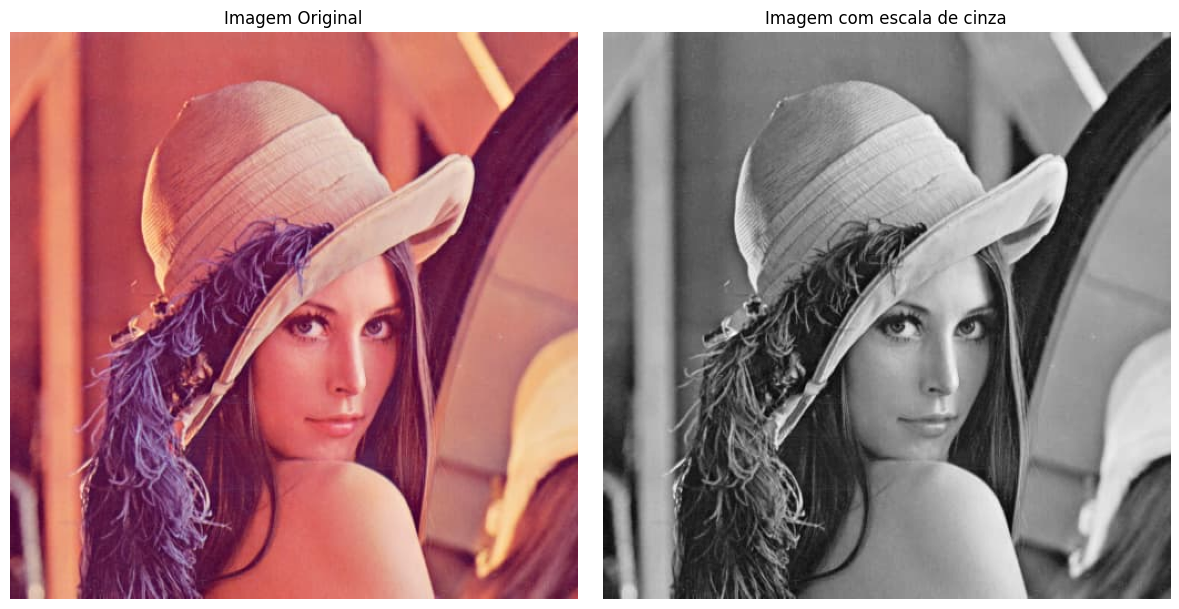

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem com escala de cinza')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Supondo que você já tenha o vetor x normalizado
x = np.linspace(0, 255, 512)  # Aqui, normalizamos de 0 a 255 para o ruído exponencial


In [6]:
# Parâmetro lambda para a distribuição exponencial
lambda_ = 1 / 20  # Inverso de lambda para a escala da exponencial

# Função de Densidade de Probabilidade (FDP) Exponencial
pdf_values = lambda_ * np.exp(-lambda_ * x)

# Função de Distribuição Acumulada (FDA)
fda_values = 1 - np.exp(-lambda_ * x)

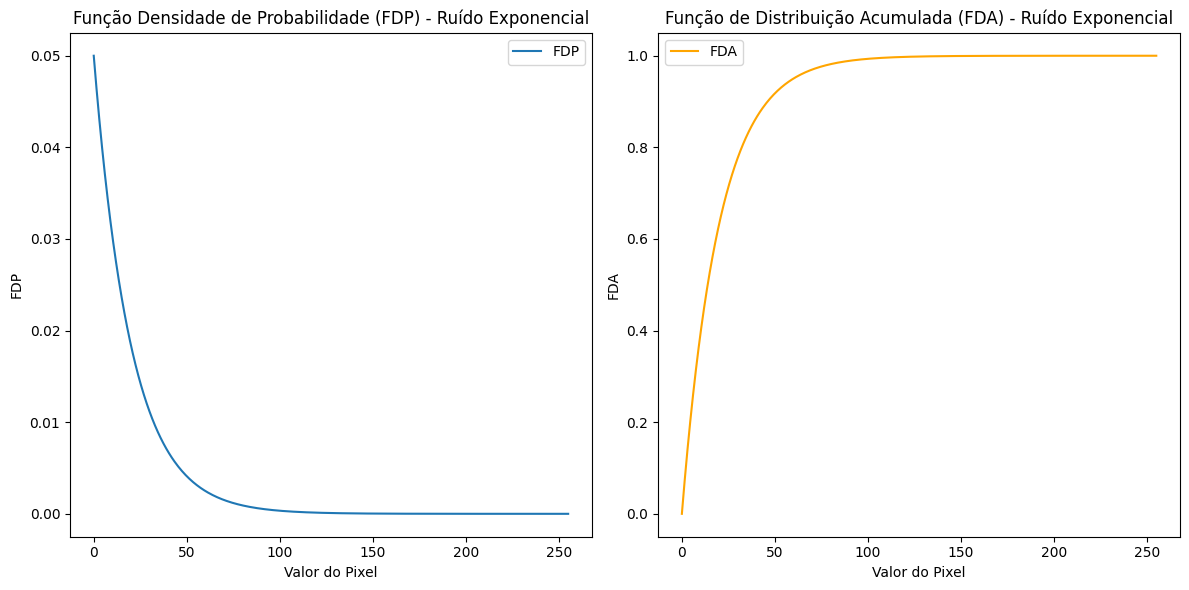

In [7]:
# Plotar a FDP e a FDA
plt.figure(figsize=(12, 6))

# Gráfico da FDP
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label="FDP")
plt.title("Função Densidade de Probabilidade (FDP) - Ruído Exponencial")
plt.xlabel("Valor do Pixel")
plt.ylabel("FDP")
plt.legend()

# Gráfico da FDA
plt.subplot(1, 2, 2)
plt.plot(x, fda_values, label="FDA", color="orange")
plt.title("Função de Distribuição Acumulada (FDA) - Ruído Exponencial")
plt.xlabel("Valor do Pixel")
plt.ylabel("FDA")
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Converter a imagem para um array NumPy
valores_pixels = np.array(imagem_cinza)

In [9]:
# Gerar ruído exponencial
ruido_exponencial = np.random.exponential(scale=20, size=valores_pixels.shape)

In [10]:
# Adicionar o ruído à imagem
valores_pixels_modificado = valores_pixels + ruido_exponencial

In [11]:
# Normalizar a imagem resultante para garantir que os valores estejam no intervalo [0, 255]
valores_pixels_modificado = np.clip(valores_pixels_modificado, 0, 255)

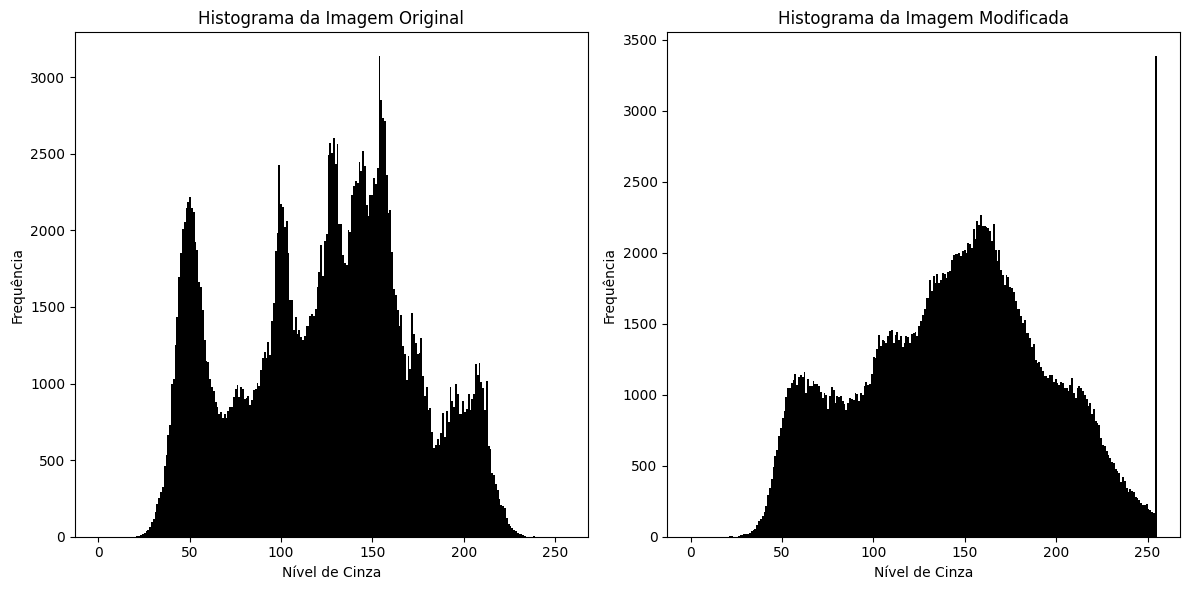

In [12]:
# Plotar os histogramas da imagem original e modificada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(valores_pixels.flatten(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da Imagem Original")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
plt.hist(valores_pixels_modificado.flatten(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da Imagem Modificada")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

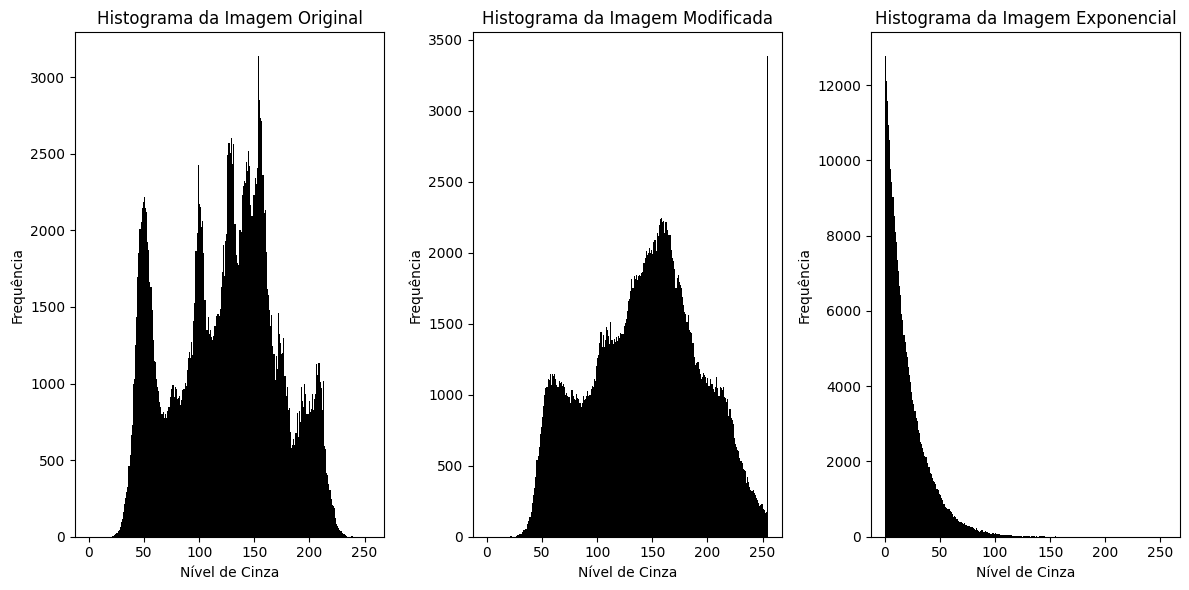

In [24]:
# Plotar os histogramas da imagem original e modificada
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(valores_pixels.flatten(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da Imagem Original")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

plt.subplot(1, 3, 2)
plt.hist(valores_pixels_modificado.flatten(), bins=255, range=(0, 255), color='black')
plt.title("Histograma da Imagem Modificada")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

aux = abs(valores_pixels - valores_pixels_modificado)
plt.subplot(1, 3, 3)
plt.hist(aux.flatten(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da Imagem Exponencial")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")


plt.tight_layout()
plt.show()

In [13]:
# Passo 4: Obter o array de valores 1D e normalizar de 0 a 1

valores_pixels_1d = valores_pixels.flatten() / 255

In [14]:
### Passo 5: Calcular a média e o desvio padrão dos valores dos pixels

media = np.mean(valores_pixels_1d)
desvio_padrao = np.std(valores_pixels_1d)

# Exibir os resultados
print("Tamanho da Imagem:", imagem_cinza.size)
print("Média:", media)
print("Desvio Padrão:", desvio_padrao)

Tamanho da Imagem: (512, 512)
Média: 0.48646373374789376
Desvio Padrão: 0.18716595137992745


In [15]:
### Passo 6: Construir e normalizar o vetor x com níveis de cinza de -1 até 1

x = np.linspace(-1, 1, 256)

# Ajustar a média e desvio padrão para o intervalo [-1, 1]
media_ajustada = (media - 0.5) * 2
desvio_padrao_ajustado = desvio_padrao * 2

In [16]:
# Função para gerar ruído exponencial
def ruido_exponencial(m=1, n=1, lambda_=1):
    # Gerar a matriz de ruído exponencial
    R = np.random.exponential(scale=lambda_, size=(m, n))
    return R

In [17]:
# Parâmetro lambda para o ruído exponencial
lambda_ = 20  # Ajuste este valor para controlar a intensidade do ruído


In [18]:
# Gerar o ruído exponencial com as mesmas dimensões da imagem
ruido_exponencial = ruido_exponencial(valores_pixels.shape[0], valores_pixels.shape[1], lambda_)


In [19]:
# Adicionar o ruído à imagem, preservando a imagem original
imagem_ruido = valores_pixels + (ruido_exponencial - np.mean(ruido_exponencial))


In [20]:
# Normalizar a imagem resultante para garantir que os valores estejam no intervalo [0, 255]
imagem_ruido = np.clip(imagem_ruido, 0, 255)


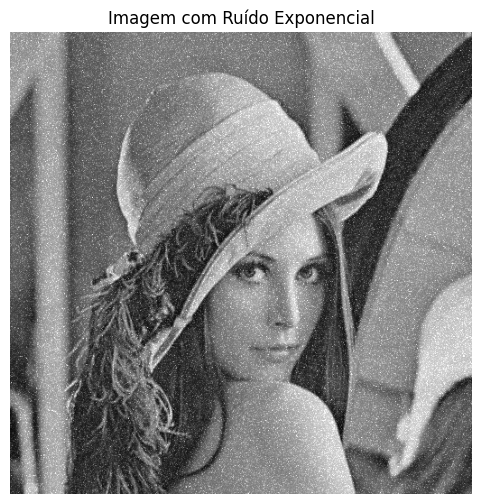

In [21]:
# Converter o array resultante de volta para uma imagem
imagem_ruido = Image.fromarray(imagem_ruido.astype(np.uint8))

# Exibir a imagem com ruído
plt.figure(figsize=(6, 6))
plt.imshow(imagem_ruido, cmap='gray')
plt.title('Imagem com Ruído Exponencial')
plt.axis('off')
plt.show()

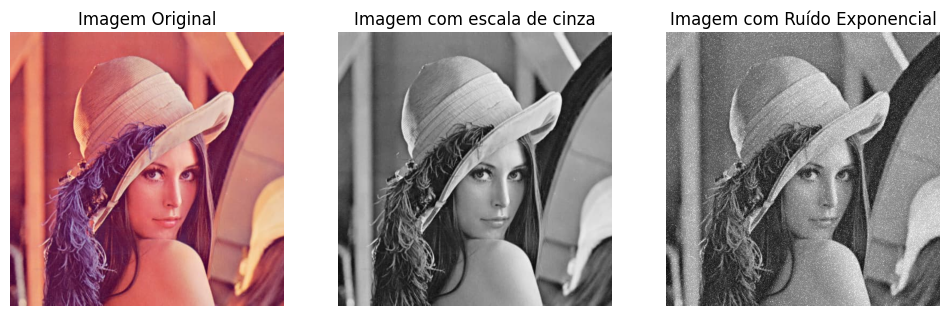

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem com escala de cinza')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagem_ruido, cmap='gray')
plt.title('Imagem com Ruído Exponencial')
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()